In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data_dir = "N:\Datasets"

In [3]:
# Change the current working directory to specified path

os.chdir(data_dir)

In [4]:
# Reading csv file

hr_data = pd.read_csv('hr.csv')

In [5]:
# Return top n (5 by default) rows of a data frame or series

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# isnull () - detect missing values
# isnull().sum() - sums up the missing values in each variable 

hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
# This returns a Series with the data type of each column

hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
# To see the unique values in a particular column, use unique()
# To convert a series to list, use tolist()

hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [9]:
# rename() is used to rename any index, column or row or alter axes labels. 

hr_data.rename(columns = {'sales':'dept'},inplace = True)

In [10]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [11]:
# Drop specified labels from rows or columns

# axis = 1 signify drop label from column
# By default, axis = 0 (drop label from index)

X = hr_data.drop('left',axis = 1)

In [12]:
# Target column

y = hr_data['left']

In [13]:
# Predictor Matrix

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [14]:
# Convert categorical variable into dummy/indicator variables

X = pd.get_dummies(X)

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split data into random train and test subsets. Returns List containing train-test split of inputs.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 400)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Create a class RandomForestClassifier object

clf = RandomForestClassifier(n_estimators = 80,
                             oob_score = True,
                             n_jobs = -1,
                             random_state = 400)

In [35]:
# Build a forest of trees from the training set (X, y).

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [36]:
# Score of the training dataset obtained using an out-of-bag estimate. 
# This attribute exists only when oob_score is True.

clf.oob_score_

0.9905825485457121

In [37]:
# Looping over to find good number of estimators with OOB score

for w in range(10,300,20):
    clf = RandomForestClassifier(n_estimators = w,
                                 oob_score = True,
                                 n_jobs = -1,
                                 random_state = 400)
    clf.fit(X_train,y_train)
    oob = clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print("*************************************")

C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\NikSid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9832486040503375
*************************************
For n_estimators = 30
OOB score is 0.9894991249270773
*************************************
For n_estimators = 50
OOB score is 0.990082506875573
*************************************
For n_estimators = 70
OOB score is 0.9905825485457121
*************************************
For n_estimators = 90
OOB score is 0.9904992082673556
*************************************
For n_estimators = 110
OOB score is 0.9908325693807817
*************************************
For n_estimators = 130
OOB score is 0.9908325693807817
*************************************
For n_estimators = 150
OOB score is 0.9905825485457121
*************************************
For n_estimators = 170
OOB score is 0.9909992499374948
*************************************
For n_estimators = 190
OOB score is 0.9909159096591382
*************************************
For n_estimators = 210
OOB score is 0.9908325693807817
*********************

In [38]:
#Finalize 190 trees

clf = RandomForestClassifier(n_estimators=190,
                             oob_score=True,
                             n_jobs=-1,
                             random_state=400)

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [40]:
clf.oob_score_

0.9909159096591382

In [41]:
# The impurity-based feature importances.
# The higher, the more important the feature. 

clf.feature_importances_

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [42]:
# Mapping columns to feature importances

imp_features = pd.Series(clf.feature_importances_,index = X.columns.tolist())

In [43]:
# Sorting feature importances in descending order

imp_features.sort_values(ascending = False)

satisfaction_level       0.313838
number_project           0.183968
time_spend_company       0.176501
average_montly_hours     0.151437
last_evaluation          0.124307
Work_accident            0.010184
salary_low               0.007224
salary_high              0.005606
dept_technical           0.003706
dept_sales               0.003536
salary_medium            0.003522
dept_support             0.002996
promotion_last_5years    0.001967
dept_IT                  0.001828
dept_RandD               0.001795
dept_accounting          0.001732
dept_hr                  0.001724
dept_management          0.001708
dept_marketing           0.001238
dept_product_mng         0.001181
dtype: float64

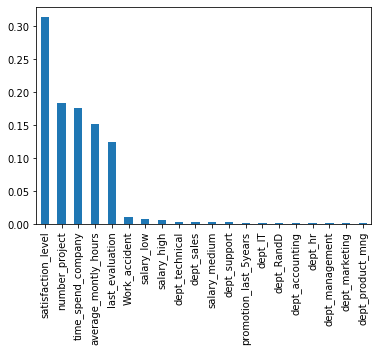

In [44]:
# Plotting a bar chart for feature importances

imp_features.sort_values(ascending = False).plot(kind = 'bar')